In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import mean_squared_error 

In [2]:
X_train = pd.read_csv('Train_MM_Int.csv')
X_train = X_train.drop('LoanApproved' , axis=1)
y_train = X_train['RiskScore']
X_train = X_train.drop('RiskScore' , axis=1)
X_train.head()

,Unnamed: 0,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0,0.629032,0.068100,0.455285,0.0,0.00,0.573770,0.067100,0.111111,0.333333,...,0.014620,0.004014,0.039867,0.614466,0.1250,0.012799,0.382726,0.441758,0.070022,0.120071
1,1,0.209677,0.063154,0.661247,0.0,0.75,0.098361,0.213760,0.666667,0.333333,...,0.041494,0.010168,0.104225,0.622996,0.3750,0.036481,0.522959,0.645749,0.110911,0.089347
2,2,0.354839,0.152409,0.720867,0.0,0.75,0.295082,0.077842,0.222222,0.000000,...,0.037730,0.045328,0.251523,0.626327,0.1250,0.013550,0.247945,0.305184,0.053450,0.032016
3,3,0.661290,0.409754,0.875339,0.0,0.50,0.590164,0.088966,0.444444,0.333333,...,0.029685,0.005003,0.676225,0.874832,0.1875,0.027415,0.224353,0.214225,0.038018,0.007892
4,4,0.225806,0.083607,0.626016,0.0,1.00,0.196721,0.185708,0.333333,0.000000,...,0.007115,0.023899,0.137979,0.600710,0.2500,0.003406,0.419008,0.392349,0.104443,0.080741


In [3]:
X_validation = pd.read_csv('Valid_MM_Int.csv')
X_validation = X_validation.drop('LoanApproved' , axis=1)
y_validation = X_validation['RiskScore']
X_validation = X_validation.drop('RiskScore' , axis=1)
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4000 non-null   int64  
 1   Age                         4000 non-null   float64
 2   AnnualIncome                4000 non-null   float64
 3   CreditScore                 4000 non-null   float64
 4   EmploymentStatus            4000 non-null   float64
 5   EducationLevel              4000 non-null   float64
 6   Experience                  4000 non-null   float64
 7   LoanAmount                  4000 non-null   float64
 8   LoanDuration                4000 non-null   float64
 9   MaritalStatus               4000 non-null   float64
 10  NumberOfDependents          4000 non-null   float64
 11  HomeOwnershipStatus         4000 non-null   float64
 12  MonthlyDebtPayments         4000 non-null   float64
 13  CreditCardUtilizationRate   4000 

In [4]:
X_test = pd.read_csv('Test_MM_Int.csv')
X_test = X_test.drop('LoanApproved' , axis=1)
y_test = X_test['RiskScore']
X_test = X_test.drop('RiskScore' , axis=1)

In [5]:
y_validation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: RiskScore
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [10]:
class SingleLayer(nn.Module):
    def __init__(self,hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(34, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [7]:
X_training = X_train.values
y_training = y_train.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_test.values
y_testing = y_test.values

In [8]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [11]:
print(X_training.shape)

(12000, 34)


Training Losses for hidden layer 8
          0
0  0.188676
1  0.186093
2  0.183507
3  0.180909
4  0.178286
 RMSE for validation set is : 0.14013294387677666
 RMSE for test set is : 0.13739980276397643
Training Losses for hidden layer 16
          0
0  1.196067
1  1.176403
2  1.156916
3  1.137606
4  1.118473
 RMSE for validation set is : 0.14036932856430626
 RMSE for test set is : 0.13726342559337715
Training Losses for hidden layer 32
          0
0  1.918116
1  1.875911
2  1.833922
3  1.792019
4  1.749952
 RMSE for validation set is : 0.13792941976870748
 RMSE for test set is : 0.13546079518767049
Training Losses for hidden layer 64
          0
0  0.363335
1  0.314250
2  0.268890
3  0.226671
4  0.178913
 RMSE for validation set is : 0.14028173512939812
 RMSE for test set is : 0.13751363605378142
Training Losses for hidden layer 128
          0
0  0.148285
1  0.112413
2  0.081575
3  0.047090
4  0.027870
 RMSE for validation set is : 0.139909513556866
 RMSE for test set is : 0.1369047874

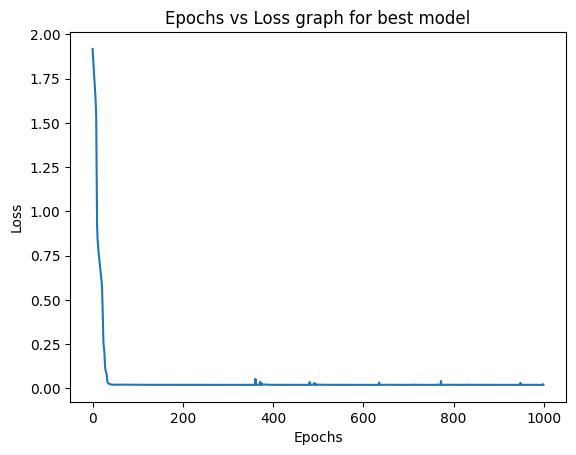

In [12]:
nuerons = [8,16,32,64,128]
min_err = 10000
again_loss = []
epochs = 1000
opt_degree = 0
for nueron in nuerons:
    model = SingleLayer(hidden1=nueron)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_arr = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train)
        loss=criterion(y_train.float(), output)
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(f"Training Losses for hidden layer {nueron}")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val).detach().numpy()
    rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
    min_err = min(min_err,rmse)
    if rmse == min_err:
        again_loss = loss_arr
        opt_degree = nueron
    y_test_pred = model(X_test).detach().numpy()
    rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print(f" RMSE for validation set is : {rmse}")
    print(f" RMSE for test set is : {rmse_2}")
print(f"The Least Validation is {min_err} for Hidden Layer of Size {opt_degree}")
plt.plot(range(epochs), again_loss)
plt.title('Epochs vs Loss graph for best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()  
    
 

In [13]:
class DoubleLayer(nn.Module):
    def __init__(self, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(34, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.149706
1  0.144072
2  0.130439
3  0.123064
4  0.118397
 RMSE for validation set is : 0.1416981597797724
 RMSE for test set is : 0.13885212989647844
Training Losses for hidden layer 16
          0
0  0.410269
1  0.396359
2  0.382717
3  0.369344
4  0.356244
 RMSE for validation set is : 0.1421559039317355
 RMSE for test set is : 0.13962149860402467
Training Losses for hidden layer 32
          0
0  0.323659
1  0.301425
2  0.280060
3  0.259577
4  0.239990
 RMSE for validation set is : 0.14308929911170815
 RMSE for test set is : 0.14028454337457402
Training Losses for hidden layer 64
          0
0  0.107174
1  0.086593
2  0.068862
3  0.054006
4  0.042009
 RMSE for validation set is : 0.14146753084505548
 RMSE for test set is : 0.13900465056689226
Training Losses for hidden layer 128
          0
0  0.236514
1  0.173300
2  0.114498
3  0.068035
4  0.041834
 RMSE for validation set is : 0.1416149790754701
 RMSE for test set is : 0.13882882008

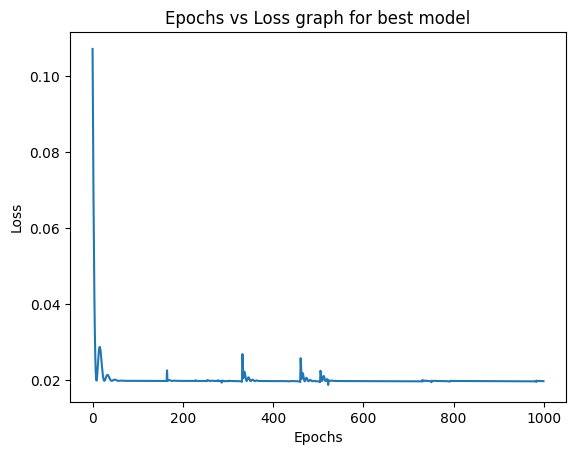

Training Losses for hidden layer 8
          0
0  0.044110
1  0.041795
2  0.039597
3  0.037515
4  0.035547
 RMSE for validation set is : 0.14133283832887156
 RMSE for test set is : 0.13852774154502276
Training Losses for hidden layer 16
          0
0  0.023790
1  0.022249
2  0.021093
3  0.020320
4  0.019905
 RMSE for validation set is : 0.14017656803109618
 RMSE for test set is : 0.13746100300784336
Training Losses for hidden layer 32
          0
0  0.057992
1  0.049559
2  0.041842
3  0.031538
4  0.026020
 RMSE for validation set is : 0.1404265752243215
 RMSE for test set is : 0.13770824398705397
Training Losses for hidden layer 64
          0
0  0.051802
1  0.038569
2  0.028964
3  0.022917
4  0.020137
 RMSE for validation set is : 0.15376199288812956
 RMSE for test set is : 0.14960313813877205
Training Losses for hidden layer 128
          0
0  0.020283
1  0.022879
2  0.020239
3  0.020223
4  0.021318
 RMSE for validation set is : 0.1398818859121851
 RMSE for test set is : 0.1369243914

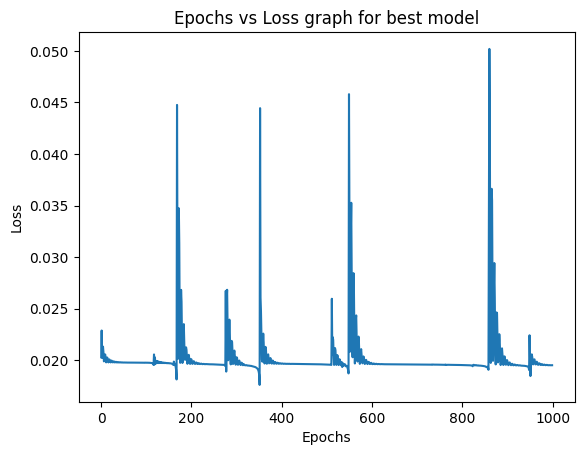

Training Losses for hidden layer 8
          0
0  0.080606
1  0.075491
2  0.070619
3  0.065991
4  0.061610
 RMSE for validation set is : 0.14083665575697207
 RMSE for test set is : 0.13804197974125856
Training Losses for hidden layer 16
          0
0  0.020123
1  0.019794
2  0.019847
3  0.019943
4  0.019911
 RMSE for validation set is : 0.13977483884272993
 RMSE for test set is : 0.13703281569157333
Training Losses for hidden layer 32
          0
0  0.295053
1  0.266645
2  0.239871
3  0.214734
4  0.191247
 RMSE for validation set is : 0.1407218374510431
 RMSE for test set is : 0.13786856255975324
Training Losses for hidden layer 64
          0
0  0.078317
1  0.054228
2  0.038013
3  0.027175
4  0.021309
 RMSE for validation set is : 0.1403968204878322
 RMSE for test set is : 0.13772903868041725
Training Losses for hidden layer 128
          0
0  0.655200
1  0.517744
2  0.397740
3  0.295285
4  0.210271
 RMSE for validation set is : 0.13924745866290245
 RMSE for test set is : 0.1363983145

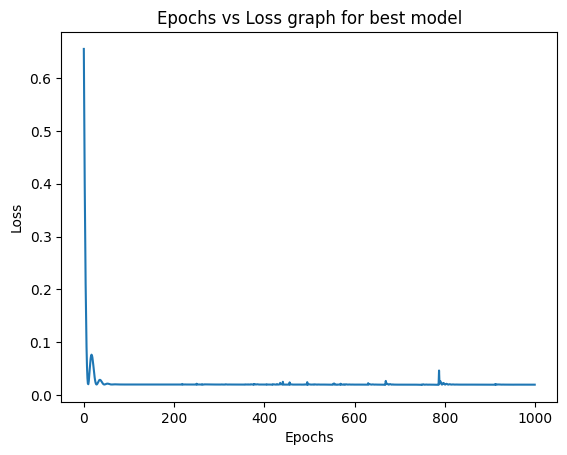

Training Losses for hidden layer 8
          0
0  0.021312
1  0.020327
2  0.019847
3  0.019802
4  0.019998
 RMSE for validation set is : 0.13665179929414087
 RMSE for test set is : 0.13358481332658517
Training Losses for hidden layer 16
          0
0  0.094853
1  0.081637
2  0.070293
3  0.060142
4  0.051064
 RMSE for validation set is : 0.14003035865454036
 RMSE for test set is : 0.13718692455735879
Training Losses for hidden layer 32
          0
0  0.029234
1  0.022302
2  0.019795
3  0.020668
4  0.021977
 RMSE for validation set is : 0.13657056407120796
 RMSE for test set is : 0.13328799511297804
Training Losses for hidden layer 64
          0
0  0.209056
1  0.159555
2  0.117823
3  0.083875
4  0.057613
 RMSE for validation set is : 0.14381067975204895
 RMSE for test set is : 0.14223820521081545
Training Losses for hidden layer 128
          0
0  0.538396
1  0.405513
2  0.290709
3  0.193845
4  0.120547
 RMSE for validation set is : 0.14006452661432855
 RMSE for test set is : 0.13721299

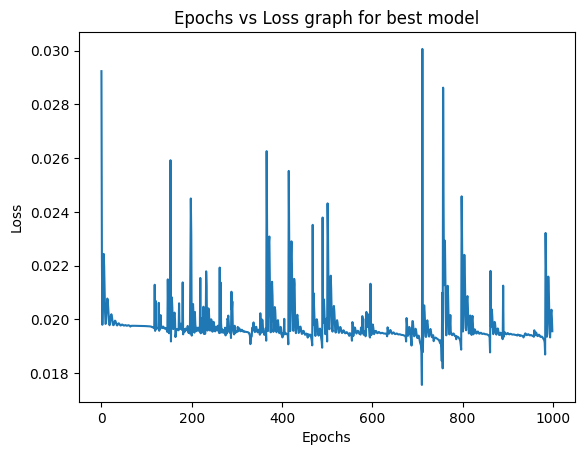

Training Losses for hidden layer 8
          0
0  0.052631
1  0.043973
2  0.036643
3  0.030669
4  0.026057
 RMSE for validation set is : 0.13901819718193575
 RMSE for test set is : 0.13607518770265223
Training Losses for hidden layer 16
          0
0  0.335608
1  0.295147
2  0.257706
3  0.223324
4  0.191999
 RMSE for validation set is : 0.13881537574784678
 RMSE for test set is : 0.13602271697493468
Training Losses for hidden layer 32
          0
0  0.027967
1  0.020532
2  0.020258
3  0.022340
4  0.022921
 RMSE for validation set is : 0.14670128974371976
 RMSE for test set is : 0.14252304293433557
Training Losses for hidden layer 64
          0
0  0.202223
1  0.132958
2  0.080632
3  0.044659
4  0.024560
 RMSE for validation set is : 0.13871263522863178
 RMSE for test set is : 0.1356318251588862
Training Losses for hidden layer 128
          0
0  0.025388
1  0.028298
2  0.024408
3  0.019789
4  0.022544
 RMSE for validation set is : 0.14369714895275848
 RMSE for test set is : 0.139699126

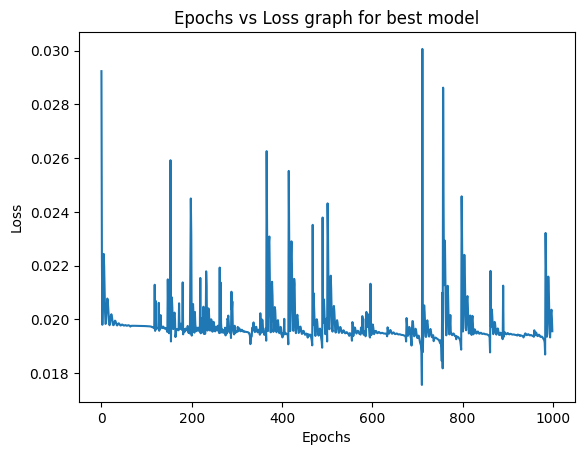

The Least Validation is 0.13657056407120796 for Hidden Layer of Size 64 & 32


In [14]:
nuerons = [8,16,32,64,128]
min_err = 10000
best_fn = 0
best_sn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for firstn in nuerons:
    for nueron in nuerons:
        model = DoubleLayer(hidden1=firstn, hidden2 = nueron)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        loss_arr = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            model.train()
            output = model(X_train)
            loss=criterion(y_train.float(), output)
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
        print(f"Training Losses for hidden layer {nueron}")
        loss_df = pd.DataFrame(loss_arr)
        print(loss_df.head())
        y_val_pred=model(X_val).detach().numpy()
        rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
        min_err = min(min_err,rmse)
        if rmse == min_err:
            again_loss = loss_arr
            best_sn = nueron
            best_fn = firstn
        y_test_pred = model(X_test).detach().numpy()
        rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print(f" RMSE for validation set is : {rmse}")
        print(f" RMSE for test set is : {rmse_2}")
    plt.plot(range(epochs), again_loss)
    plt.title('Epochs vs Loss graph for best model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn}")
 

In [15]:
class TripleLayer(nn.Module):
    def __init__(self, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(34, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.761645
1  0.749486
2  0.737442
3  0.725514
4  0.713703
 RMSE for validation set is : 0.1424098655002308 for combination 8 & 8 & 8
 RMSE for test set is : 0.13995592903121185 for combination 8 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.096365
1  0.089494
2  0.082955
3  0.076752
4  0.070889
 RMSE for validation set is : 0.14216225866397722 for combination 8 & 8 & 16
 RMSE for test set is : 0.1396035875979123 for combination 8 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.259325
1  0.239689
2  0.220916
3  0.203018
4  0.186006
 RMSE for validation set is : 0.14237593332006507 for combination 8 & 8 & 32
 RMSE for test set is : 0.14003817984969205 for combination 8 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.024266
1  0.020694
2  0.019793
3  0.020585
4  0.021356
 RMSE for validation set is : 0.14215887169255886 for combination 8 & 8 & 64
 RMSE for test set is : 0.13990204464503525 for comb

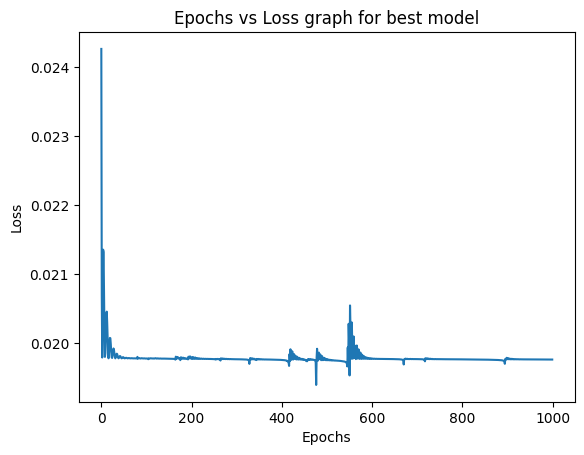

Training Losses for hidden layer 8
          0
0  0.032588
1  0.030833
2  0.029207
3  0.027713
4  0.026352
 RMSE for validation set is : 0.1422409813771591 for combination 8 & 16 & 8
 RMSE for test set is : 0.13992082933027722 for combination 8 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.157565
1  0.146881
2  0.136608
3  0.126610
4  0.114910
 RMSE for validation set is : 0.14226978090637796 for combination 8 & 16 & 16
 RMSE for test set is : 0.13964402251833988 for combination 8 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.579332
1  0.545128
2  0.512056
3  0.480125
4  0.449350
 RMSE for validation set is : 0.14244388766986554 for combination 8 & 16 & 32
 RMSE for test set is : 0.14008679979550492 for combination 8 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.538901
1  0.482145
2  0.428813
3  0.378946
4  0.332572
 RMSE for validation set is : 0.14242215312945253 for combination 8 & 16 & 64
 RMSE for test set is : 0.13997187871644903 

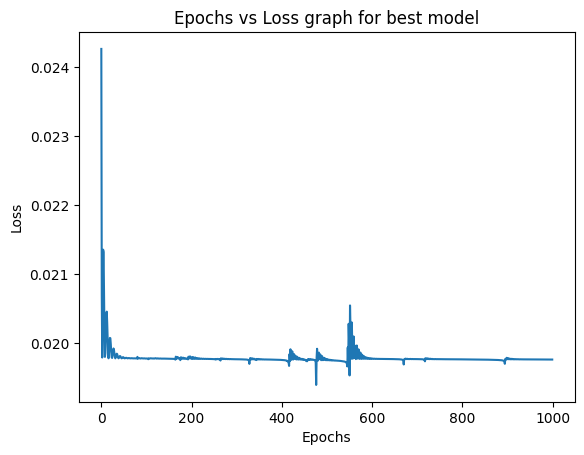

Training Losses for hidden layer 8
          0
0  0.260782
1  0.249965
2  0.239441
3  0.229212
4  0.219279
 RMSE for validation set is : 0.14191285479089719 for combination 8 & 32 & 8
 RMSE for test set is : 0.13945919499156254 for combination 8 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.278922
1  0.262145
2  0.245964
3  0.230387
4  0.215421
 RMSE for validation set is : 0.14256242116903345 for combination 8 & 32 & 16
 RMSE for test set is : 0.1400195572382546 for combination 8 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.808905
1  0.757479
2  0.707911
3  0.660216
4  0.614414
 RMSE for validation set is : 0.14223629329116558 for combination 8 & 32 & 32
 RMSE for test set is : 0.13992463654945803 for combination 8 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.019912
1  0.021293
2  0.019936
3  0.020054
4  0.020565
 RMSE for validation set is : 0.14204232250358567 for combination 8 & 32 & 64
 RMSE for test set is : 0.13968672594286935 

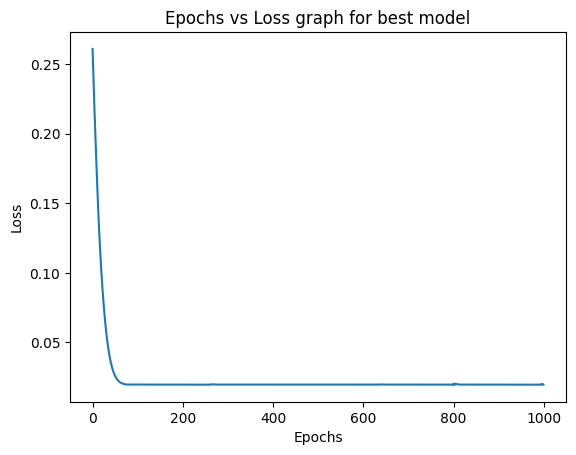

Training Losses for hidden layer 8
          0
0  0.070574
1  0.059902
2  0.050529
3  0.042473
4  0.035732
 RMSE for validation set is : 0.14138502467489975 for combination 8 & 64 & 8
 RMSE for test set is : 0.13877069283522064 for combination 8 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.030445
1  0.025722
2  0.022406
3  0.020475
4  0.019792
 RMSE for validation set is : 0.14223753735139266 for combination 8 & 64 & 16
 RMSE for test set is : 0.13941924086872645 for combination 8 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.158157
1  0.131017
2  0.106923
3  0.085919
4  0.068014
 RMSE for validation set is : 0.14244248849428087 for combination 8 & 64 & 32
 RMSE for test set is : 0.13989958154746646 for combination 8 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.036425
1  0.023773
2  0.019785
3  0.021902
4  0.024916
 RMSE for validation set is : 0.14103562617385437 for combination 8 & 64 & 64
 RMSE for test set is : 0.13835290706299327

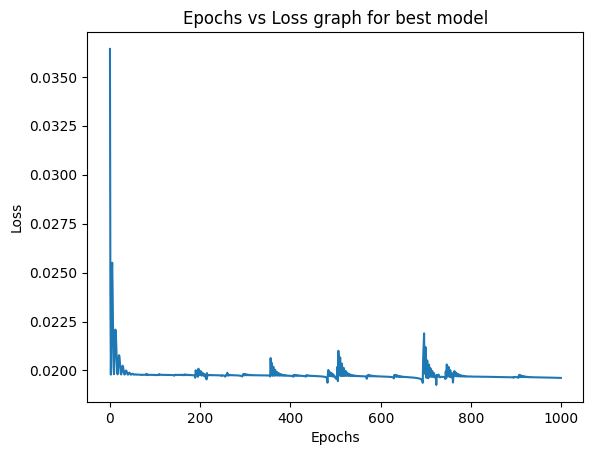

Training Losses for hidden layer 8
          0
0  0.049984
1  0.047643
2  0.045400
3  0.043255
4  0.041210
 RMSE for validation set is : 0.14201404083288385 for combination 16 & 8 & 8
 RMSE for test set is : 0.13954680419123908 for combination 16 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.020635
1  0.020086
2  0.019820
3  0.019795
4  0.019904
 RMSE for validation set is : 0.14201301778724626 for combination 16 & 8 & 16
 RMSE for test set is : 0.13952520575252741 for combination 16 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.020623
1  0.019839
2  0.019885
3  0.020138
4  0.020129
 RMSE for validation set is : 0.1406013879556066 for combination 16 & 8 & 32
 RMSE for test set is : 0.1384413307146466 for combination 16 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.595241
1  0.538071
2  0.484000
3  0.433073
4  0.385323
 RMSE for validation set is : 0.14188824933107674 for combination 16 & 8 & 64
 RMSE for test set is : 0.13929122641637715 f

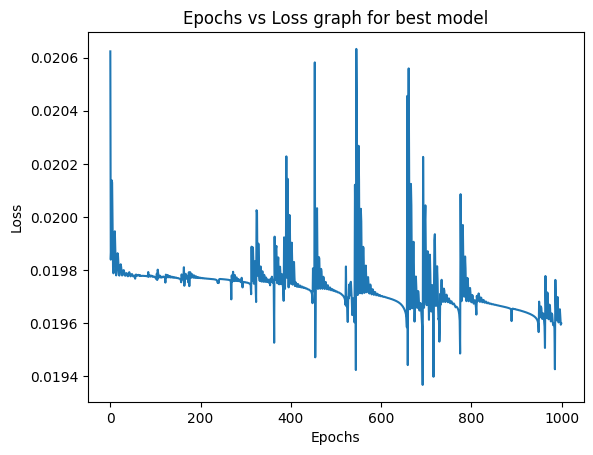

Training Losses for hidden layer 8
          0
0  0.032387
1  0.030503
2  0.028777
3  0.027211
4  0.025806
 RMSE for validation set is : 0.1415319732147222 for combination 16 & 16 & 8
 RMSE for test set is : 0.13927740545061496 for combination 16 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.742727
1  0.719758
2  0.697244
3  0.675187
4  0.653591
 RMSE for validation set is : 0.14242580193919394 for combination 16 & 16 & 16
 RMSE for test set is : 0.14007862229266935 for combination 16 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.176033
1  0.157494
2  0.140276
3  0.124284
4  0.109515
 RMSE for validation set is : 0.14307578645232072 for combination 16 & 16 & 32
 RMSE for test set is : 0.14032153659089328 for combination 16 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.059203
1  0.044677
2  0.033588
3  0.025907
4  0.021453
 RMSE for validation set is : 0.14188476392362767 for combination 16 & 16 & 64
 RMSE for test set is : 0.13952146106

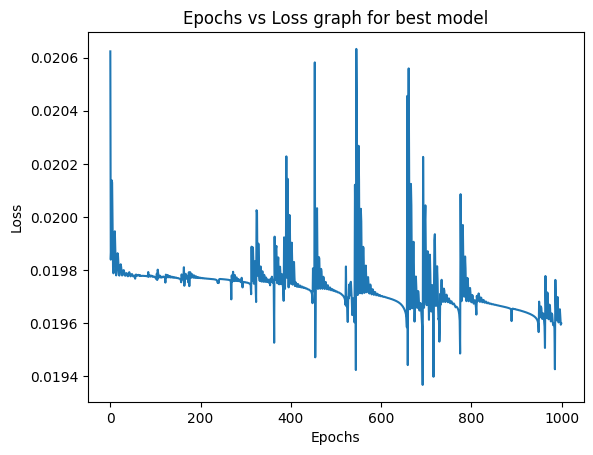

Training Losses for hidden layer 8
          0
0  0.023214
1  0.021751
2  0.020817
3  0.020204
4  0.019874
 RMSE for validation set is : 0.14105873637699123 for combination 16 & 32 & 8
 RMSE for test set is : 0.13870269808929672 for combination 16 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.020357
1  0.019812
2  0.019873
3  0.020044
4  0.020013
 RMSE for validation set is : 0.14152375418374633 for combination 16 & 32 & 16
 RMSE for test set is : 0.13953600538977948 for combination 16 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.364296
1  0.328795
2  0.295334
3  0.263928
4  0.234593
 RMSE for validation set is : 0.14202349054062868 for combination 16 & 32 & 32
 RMSE for test set is : 0.13979540607289925 for combination 16 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.053245
1  0.037783
2  0.027230
3  0.021426
4  0.019782
 RMSE for validation set is : 0.14198657343495202 for combination 16 & 32 & 64
 RMSE for test set is : 0.1399587371

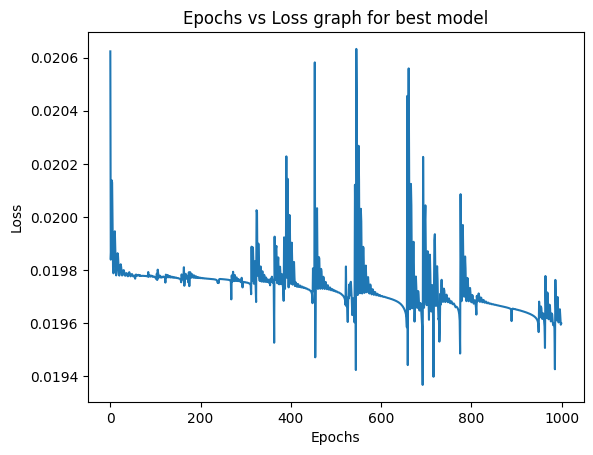

Training Losses for hidden layer 8
          0
0  0.394958
1  0.371637
2  0.349073
3  0.327289
4  0.306302
 RMSE for validation set is : 0.14181118937559645 for combination 16 & 64 & 8
 RMSE for test set is : 0.1395919525512403 for combination 16 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.934439
1  0.885331
2  0.837756
3  0.791739
4  0.747300
 RMSE for validation set is : 0.14145306002119118 for combination 16 & 64 & 16
 RMSE for test set is : 0.13895187853596522 for combination 16 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.030816
1  0.023878
2  0.020395
3  0.019883
4  0.021113
 RMSE for validation set is : 0.14120822735054847 for combination 16 & 64 & 32
 RMSE for test set is : 0.13875256460843916 for combination 16 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.296862
1  0.230893
2  0.174233
3  0.126933
4  0.088902
 RMSE for validation set is : 0.1421899868674312 for combination 16 & 64 & 64
 RMSE for test set is : 0.139940456698

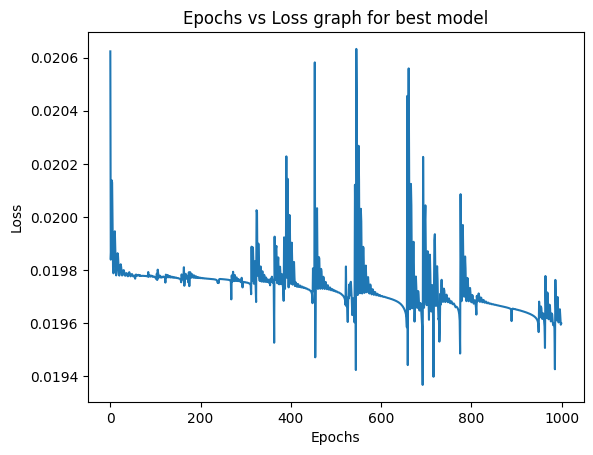

Training Losses for hidden layer 8
          0
0  0.024691
1  0.023616
2  0.022682
3  0.021888
4  0.021232
 RMSE for validation set is : 0.14106884424988028 for combination 32 & 8 & 8
 RMSE for test set is : 0.13885068111261206 for combination 32 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.091779
1  0.085413
2  0.079360
3  0.073625
4  0.068209
 RMSE for validation set is : 0.14200828282618932 for combination 32 & 8 & 16
 RMSE for test set is : 0.13968881943525455 for combination 32 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.226975
1  0.209074
2  0.192009
3  0.175793
4  0.160435
 RMSE for validation set is : 0.14217737130360386 for combination 32 & 8 & 32
 RMSE for test set is : 0.1397323156424951 for combination 32 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.024795
1  0.020933
2  0.019780
3  0.020488
4  0.021391
 RMSE for validation set is : 0.1365105815286331 for combination 32 & 8 & 64
 RMSE for test set is : 0.13370125388079612 f

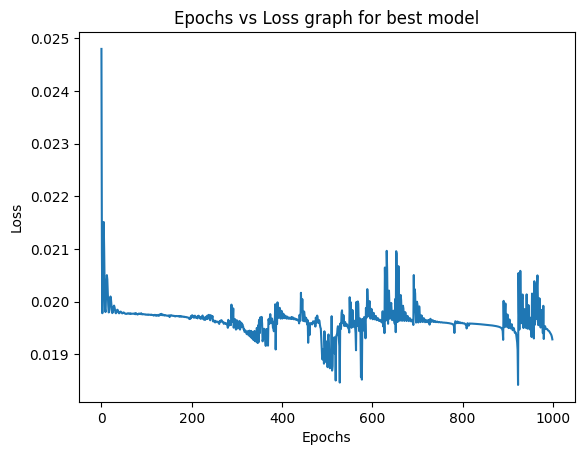

Training Losses for hidden layer 8
          0
0  0.209688
1  0.201561
2  0.193605
3  0.185821
4  0.178214
 RMSE for validation set is : 0.1415969058619423 for combination 32 & 16 & 8
 RMSE for test set is : 0.13915857012999253 for combination 32 & 16 & 8
Training Losses for hidden layer 16
          0
0  1.962210
1  1.916700
2  1.870585
3  1.828488
4  1.787282
 RMSE for validation set is : 0.14246596536427297 for combination 32 & 16 & 16
 RMSE for test set is : 0.14010030825051425 for combination 32 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.167574
1  0.150037
2  0.133616
3  0.118332
4  0.104201
 RMSE for validation set is : 0.14197163072300423 for combination 32 & 16 & 32
 RMSE for test set is : 0.13966328201891 for combination 32 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.021104
1  0.019836
2  0.020658
3  0.020440
4  0.019897
 RMSE for validation set is : 0.14024020238685544 for combination 32 & 16 & 64
 RMSE for test set is : 0.13796638293412

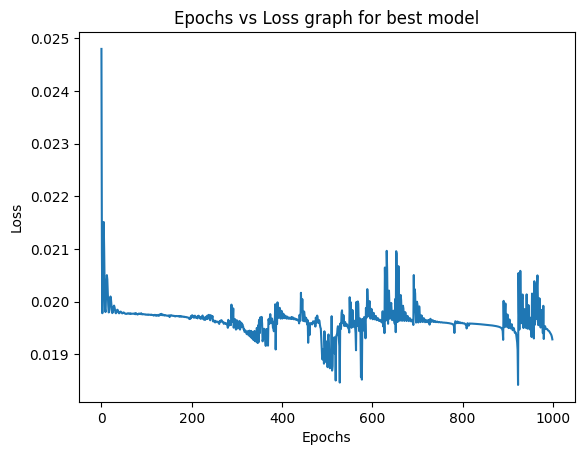

Training Losses for hidden layer 8
          0
0  0.070850
1  0.066095
2  0.061578
3  0.057303
4  0.053270
 RMSE for validation set is : 0.1419071451817083 for combination 32 & 32 & 8
 RMSE for test set is : 0.13932933228121444 for combination 32 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.138100
1  0.123318
2  0.110132
3  0.097941
4  0.086726
 RMSE for validation set is : 0.1412021726576372 for combination 32 & 32 & 16
 RMSE for test set is : 0.13865539291646542 for combination 32 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.311506
1  0.276157
2  0.243111
3  0.212028
4  0.183639
 RMSE for validation set is : 0.1408690216222621 for combination 32 & 32 & 32
 RMSE for test set is : 0.13833077885335474 for combination 32 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.077417
1  0.056206
2  0.040030
3  0.028795
4  0.022256
 RMSE for validation set is : 0.14110717628235128 for combination 32 & 32 & 64
 RMSE for test set is : 0.1386204207689

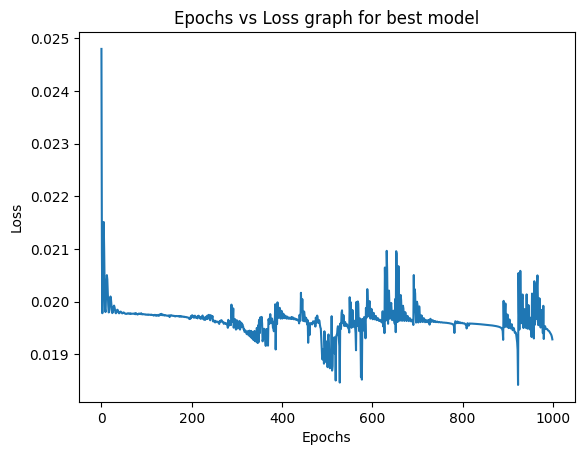

Training Losses for hidden layer 8
          0
0  0.417434
1  0.398865
2  0.381339
3  0.364283
4  0.347693
 RMSE for validation set is : 0.14218269670149447 for combination 32 & 64 & 8
 RMSE for test set is : 0.13978086208321233 for combination 32 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.019911
1  0.020058
2  0.019882
3  0.019788
4  0.019901
 RMSE for validation set is : 0.13875314856084192 for combination 32 & 64 & 16
 RMSE for test set is : 0.13566077830576154 for combination 32 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.297755
1  0.252492
2  0.211445
3  0.174637
4  0.142082
 RMSE for validation set is : 0.13884821948684298 for combination 32 & 64 & 32
 RMSE for test set is : 0.13669458584456876 for combination 32 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.259767
1  0.200806
2  0.150543
3  0.108963
4  0.075933
 RMSE for validation set is : 0.14005985877045998 for combination 32 & 64 & 64
 RMSE for test set is : 0.1377322641

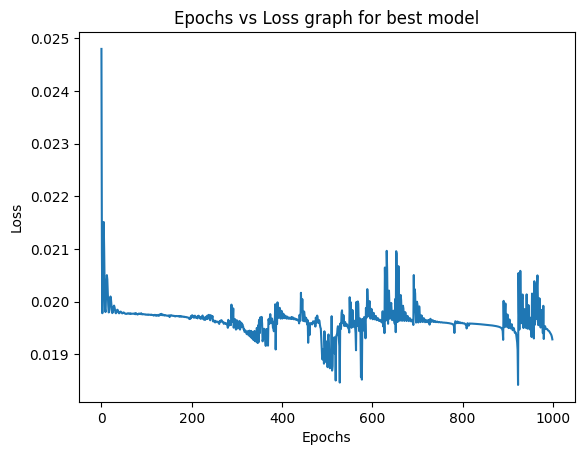

Training Losses for hidden layer 8
          0
0  1.126245
1  1.108743
2  1.091336
3  1.074293
4  1.057431
 RMSE for validation set is : 0.14248553627211086 for combination 64 & 8 & 8
 RMSE for test set is : 0.14009665205513314 for combination 64 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.052566
1  0.047061
2  0.042591
3  0.038599
4  0.035019
 RMSE for validation set is : 0.1440797403243159 for combination 64 & 8 & 16
 RMSE for test set is : 0.14229000059742344 for combination 64 & 8 & 16
Training Losses for hidden layer 32
          0
0  1.234457
1  1.186397
2  1.139351
3  1.093292
4  1.048232
 RMSE for validation set is : 0.14242879023166524 for combination 64 & 8 & 32
 RMSE for test set is : 0.14008025783142689 for combination 64 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.033558
1  0.026010
2  0.021502
3  0.019826
4  0.020303
 RMSE for validation set is : 0.14114426401422497 for combination 64 & 8 & 64
 RMSE for test set is : 0.1385652105025877 f

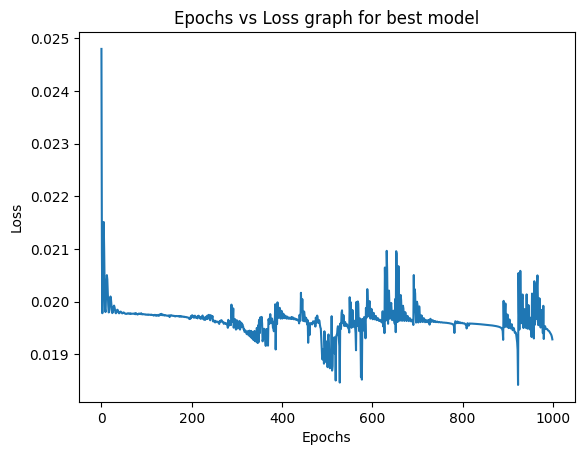

Training Losses for hidden layer 8
          0
0  0.026194
1  0.024651
2  0.023331
3  0.022220
4  0.021307
 RMSE for validation set is : 0.14099924304096134 for combination 64 & 16 & 8
 RMSE for test set is : 0.13862357171400363 for combination 64 & 16 & 8
Training Losses for hidden layer 16
          0
0  1.270177
1  1.234526
2  1.200594
3  1.167560
4  1.135173
 RMSE for validation set is : 0.1424749340632203 for combination 64 & 16 & 16
 RMSE for test set is : 0.14009530256254754 for combination 64 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.099435
1  0.085612
2  0.073127
3  0.062004
4  0.052256
 RMSE for validation set is : 0.14120239031449544 for combination 64 & 16 & 32
 RMSE for test set is : 0.13909691159818927 for combination 64 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.203020
1  0.168237
2  0.137434
3  0.110449
4  0.087262
 RMSE for validation set is : 0.1416926649958605 for combination 64 & 16 & 64
 RMSE for test set is : 0.139257029227

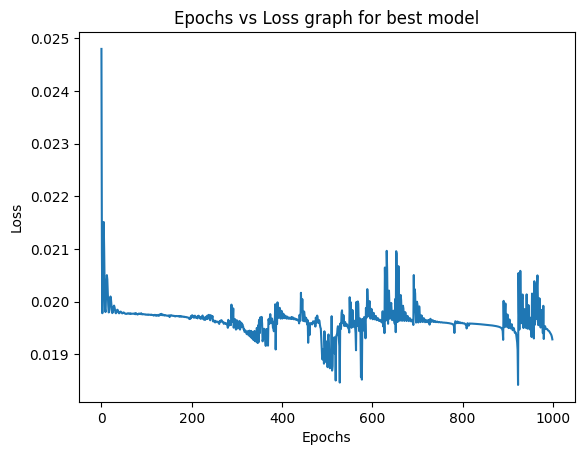

Training Losses for hidden layer 8
          0
0  0.414034
1  0.397039
2  0.379132
3  0.361143
4  0.345436
 RMSE for validation set is : 0.142230053182804 for combination 64 & 32 & 8
 RMSE for test set is : 0.13985628386222326 for combination 64 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.495022
1  0.467618
2  0.441160
3  0.415594
4  0.390910
 RMSE for validation set is : 0.14218719005550937 for combination 64 & 32 & 16
 RMSE for test set is : 0.1402965458314728 for combination 64 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.026975
1  0.022629
2  0.020321
3  0.019795
4  0.020420
 RMSE for validation set is : 0.14052832777409124 for combination 64 & 32 & 32
 RMSE for test set is : 0.13798672701533338 for combination 64 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.196351
1  0.153224
2  0.116614
3  0.086408
4  0.062406
 RMSE for validation set is : 0.14126633392475083 for combination 64 & 32 & 64
 RMSE for test set is : 0.1386294501513

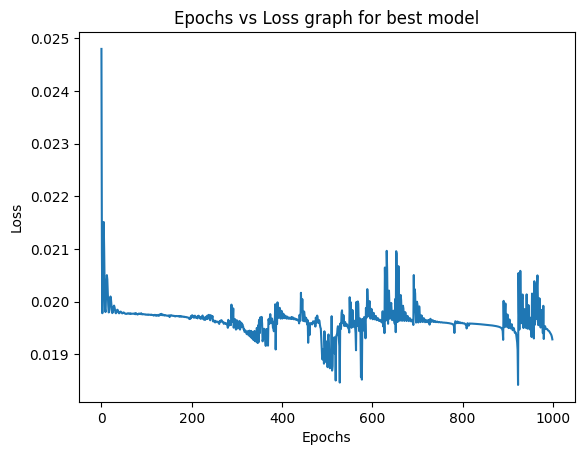

Training Losses for hidden layer 8
          0
0  0.780678
1  0.745977
2  0.712164
3  0.679267
4  0.647310
 RMSE for validation set is : 0.14247144993455507 for combination 64 & 64 & 8
 RMSE for test set is : 0.14009486380846334 for combination 64 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.762152
1  0.700593
2  0.641622
3  0.585315
4  0.531754
 RMSE for validation set is : 0.1419585037157178 for combination 64 & 64 & 16
 RMSE for test set is : 0.13980509900493232 for combination 64 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.063772
1  0.047068
2  0.034504
3  0.025967
4  0.021231
 RMSE for validation set is : 0.1395109540247342 for combination 64 & 64 & 32
 RMSE for test set is : 0.13741461909809974 for combination 64 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.025787
1  0.019938
2  0.021250
3  0.022820
4  0.021936
 RMSE for validation set is : 0.14010955467523153 for combination 64 & 64 & 64
 RMSE for test set is : 0.137612588531

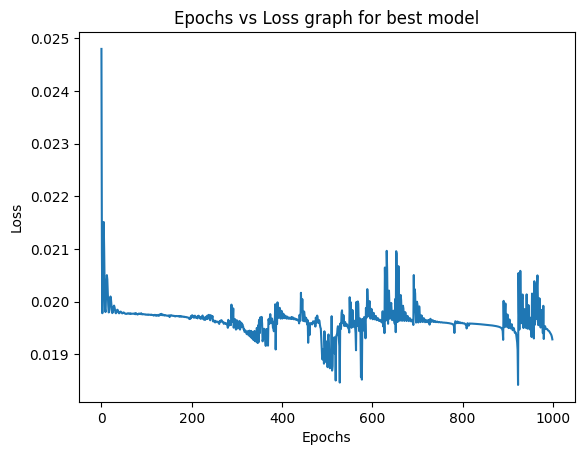

The Least Validation is 0.1365105815286331 for Hidden Layer of Size 32 & 8 & 64


In [16]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
best_tn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for nueronF in nuerons:
    for firstn in nuerons:
        for nueron in nuerons:
            model = TripleLayer(hidden1=nueronF,hidden2=firstn, hidden3 = nueron)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_arr = []
            for epoch in range(epochs):
                optimizer.zero_grad()
                model.train()
                output = model(X_train)
                loss=criterion(y_train.float(), output)
                loss_arr.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print(f"Training Losses for hidden layer {nueron}")
            loss_df = pd.DataFrame(loss_arr)
            print(loss_df.head())
            y_val_pred=model(X_val).detach().numpy()
            rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
            min_err = min(min_err,rmse)
            if rmse == min_err:
                again_loss = loss_arr
                best_sn = firstn
                best_fn = nueronF
                best_tn = nueron
            y_test_pred = model(X_test).detach().numpy()
            rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
            print(f" RMSE for validation set is : {rmse} for combination {nueronF} & {firstn} & {nueron}")
            print(f" RMSE for test set is : {rmse_2} for combination {nueronF} & {firstn} & {nueron}")
        plt.plot(range(epochs), again_loss)
        plt.title('Epochs vs Loss graph for best model')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn} & {best_tn}")
 

In [17]:
model = SingleLayer(hidden1=32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


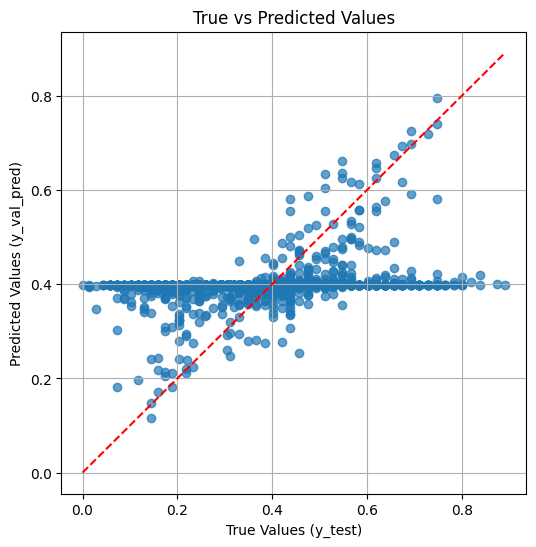

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [19]:
model = DoubleLayer(hidden1=64,hidden2 = 32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


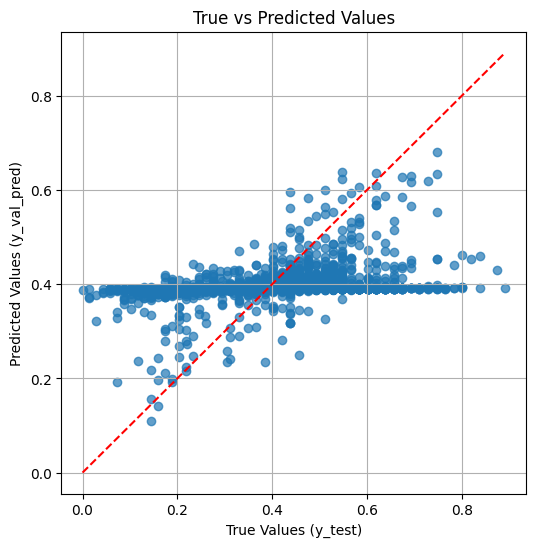

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [21]:
model = TripleLayer(hidden1=32,hidden2 = 8, hidden3=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


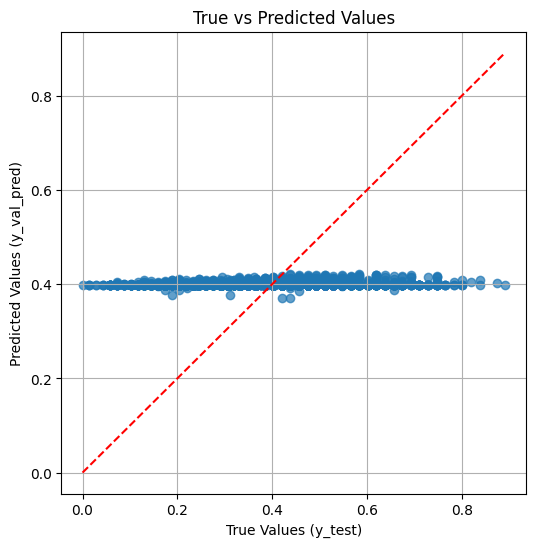

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()